# STA365 Midterm Exam

Name: _________Tianyu Yang, Sky_________ $\longleftarrow$ Double click and replace the underscore with your name to indicate your understanding and agreement to the following rules of the exam

> ### Rules
> 1. You may ask me questions privately on [piazza](https://piazza.com/class/m5jvyco84083fm) https://piazza.com/class/m5jvyco84083fm 
>    1. I will convert reasonable questions public posts and answer them publicly
>    2. *With the exception of piazza Q&A...*
> 2. The midterm exam is open notes and open internet (including chatbots) **but you may not collaborate with other humans to complete this exam, but you may use any resources available online**


## Part 1: Metropolis-Hastings

**Metropolis-Hastings** targetting **stationary distribution** $p$ based on **proposal distribution** $q$ given below

$$q(\tilde x^{(t)} | x^{(t-1)}) = \left(\frac{2}{3}\right)^{1-{\tilde x^{(t)}}}\left(\frac{1}{3}\right)^{\tilde x^{(t)}} \quad
\textrm{ and } \quad p(x^{(t)}) = \left(\frac{1}{3}\right)^{1-{x^{(t)}}}\left(\frac{2}{3}\right)^{x^{(t)}}$$

has **transition kernel** $K$ of transition probabilities 

$K = \left[\begin{array}{cc}\Pr(x^{(t)}=0 \rightarrow x^{(t+1)}=0) & \Pr(x^{(t)}=1 \rightarrow x^{(t+1)}=0)\\\Pr(x^{(t)}=0 \rightarrow x^{(t+1)}=1)& \Pr(x^{(t)}=1 \rightarrow x^{(t+1)}=1)\end{array}\right] = \left[\begin{array}{cl} 2/3 & 1/6 \\ 1/3 & 5/6 \end{array}\right]$


## Part 1A (5%)

First, recall what happened in Q3 of the notebook:

We had a symmetric (``flip-a-coin'') proposal distribution: from either state $0$ or $1$, 
we proposed to switch to the other state with probability $1/2.$ 

Because the target distribution 
$$
p(0) = \tfrac13, \quad p(1) = \tfrac23
$$
is not symmetric, the acceptance probabilities in Q3 were sometimes less than 1 
(i.e., some proposals got rejected).

By contrast, in the Metropolis--Hastings setup of this question:

The proposal distribution $q(\tilde{x}\mid x)$ is already tilted in the same way as the target. 
Concretely,
$$
q(\tilde{x} = 0\mid x) = \tfrac{2}{3},
\quad
q(\tilde{x} = 1\mid x) = \tfrac{1}{3},
$$
regardless of whether $x$ is $0$ or $1$.

Because $q$ happens to be proportional to $p$ in the right way, 
the Metropolis--Hastings acceptance probability for going from $x$ to $\tilde{x}$ ends up being
$$
\alpha(x \to \tilde{x})
\;=\;
\min\!\Bigl(1,\;
  \frac{p(\tilde{x})\,q(x\mid\tilde{x})}{p(x)\,q(\tilde{x}\mid x)}
\Bigr)
\;=\; 1.
$$
In other words, every proposal is accepted.

### How is this different from `Q3` in `Bayes_03_Metropolis_Hastings.ipynb`<br>and why is this?

#### *Double Click and Answer below in this cell*

1. Different proposal mechanism. 
   - Q3: Propose flipping the state with probability $1/2.$  
   - Here: Propose $0$ with probability $2/3$ and $1$ with probability $1/3$ (no matter the current state).

2. Different acceptance behaviour.
   - Q3: Some proposals are rejected (acceptance $<1$) because of the asymmetry in the target $p.$  
   - Here: All proposals are accepted, since $q$ and $p$ line up perfectly in the Metropolis--Hastings ratio.

3. Hence, a different transition kernel. 
   - Q3 leads to one Markov chain (with its specific row/column probabilities).  
   - Here, we get the kernel
   $$
   K \;=\;
   \begin{bmatrix}
       \tfrac{2}{3} & \tfrac{1}{6}\\[6pt]
       \tfrac{1}{3} & \tfrac{5}{6}
   \end{bmatrix},
   $$
   which has no rejection built into it (but is still a valid MH chain).
   
<!-- The answer is not "because it has been specified differently": -->
<!-- one is specified differently and the other changes as a result -->

### How is this similar to `Q3` in `Bayes_03_Metropolis_Hastings.ipynb`<br>and why is this true?

#### *Double Click and Answer below in this cell*

- They share the same target (stationary) distribution 
  $$
    p(0)=\tfrac{1}{3}, \quad p(1)=\tfrac{2}{3}.
  $$
- They are both valid Metropolis--Hastings schemes (irreducible, aperiodic) that will converge to the 
  same $p.$

The key reason the stationary distribution is the same is simply 
Metropolis--Hastings correctness:

No matter which (irreducible) proposal $q(\cdot\mid x)$ you choose, as long as you use the MH acceptance ratio
$$
\alpha(x \to \tilde{x})
\;=\;
\min\!\Bigl(1,\;
  \frac{p(\tilde{x})\,q(x\mid\tilde{x})}{p(x)\,q(\tilde{x}\mid x)}
\Bigr),
$$
the resulting Markov chain has p as its invariant distribution.

Thus both Q3 and the chain here sample from the same stationary distribution, 
despite having different proposals and therefore different transition kernels.

<!-- The answer is not "because it has been specified the same way": -->
<!-- this is asking why the stationary distribution will be the same -->





## Part 1B (5%)

### What is the Metropolis-Hastings acceptance probability $\alpha_{mh}$ here?

#### *Double Click and Answer below in this cell*

<!-- You don't have to write this in LaTeX but it's probably easy to do so -->
$\alpha_{mh} =$ 1 or 1/4

In a generic Metropolis--Hastings update, we:

1. Start at current state $x$.

2. Propose a new state $\tilde{x}$ by drawing from $q(\tilde{x} \mid x)$.

3. Accept with probability
$$
\alpha(x \to \tilde{x})
\;=\;
\min\!\Bigl(1,\;
  \frac{p(\tilde{x})\,q(x\mid \tilde{x})}{p(x)\,q(\tilde{x}\mid x)}
\Bigr).
$$
Otherwise, reject and stay at $x$.

In our specific 2-state example:

- **Target:** 
  $$
  p(0)=\tfrac{1}{3}, 
  \quad 
  p(1)=\tfrac{2}{3}.
  $$
- **Proposal:** 
  $$
  q(0\mid x)=\tfrac{2}{3}, 
  \quad 
  q(1\mid x)=\tfrac{1}{3},
  $$
  regardless of $x$.

Let's compute $\alpha(x \to \tilde{x})$ case by case:

- **From 0 to 1:**
  $$
  \alpha(0 \to 1)
  \;=\;
  \min\Bigl(1,\;
    \frac{p(1)\,q(0\mid 1)}{p(0)\,q(1\mid 0)}
  \Bigr)
  \;=\;
  \min\Bigl(1,\;
    \frac{\tfrac{2}{3} \times \tfrac{2}{3}}{\tfrac{1}{3} \times \tfrac{1}{3}}
  \Bigr)
  \;=\;
  \min(1,4)
  \;=\;
  1.
  $$

- **From 1 to 0:**
  $$
  \alpha(1 \to 0)
  \;=\;
  \min\Bigl(1,\;
    \frac{p(0)\,q(1\mid 0)}{p(1)\,q(0\mid 1)}
  \Bigr)
  \;=\;
  \min\Bigl(1,\;
    \frac{\tfrac{1}{3} \times \tfrac{1}{3}}{\tfrac{2}{3} \times \tfrac{2}{3}}
  \Bigr)
  \;=\;
  \min(1,\tfrac{1}{4})
  \;=\;
  \tfrac{1}{4}.
  $$

- **From 0 to 0 or from 1 to 1:** 
  Proposing the same state we are already in has a ratio 
  $$
  \frac{p(x)\,q(x\mid x)}{p(x)\,q(x\mid x)} = 1,
  $$
  hence $\alpha=1.$

Therefore, the Metropolis--Hastings acceptance probability $\alpha_{mh}$ is:

- 1 for three of the four possible proposals,
- and $1/4$ only when going from state 1 to 0.


### What is the difference between the *acceptance probability,  proposal distribution, transition kernel, stationary distribution and target distribution*?

#### *Double Click and Answer below in this cell*

<!-- You don't have to use this answer structure template but it might help -->
The proposal distribution... which is... and altogether this process results in the... and then finally the stationary distribution is... which are... 

Proposal Distribution $(q(\tilde{x} \mid x))$

This is the mechanism used to propose a candidate next state $\tilde{x}$, given current state $x$.  
It does not directly specify how likely it is that you move to $\tilde{x}$;  
it only tells you how you sample the candidate.

Acceptance Probability $(\alpha(x \to \tilde{x}))$

Once $\tilde{x}$ is proposed, $\alpha$ is the probability you accept the proposal  
(as opposed to "reject" and remain at $x$).  
This is computed via the Metropolis-Hastings ratio formula:
$$
\alpha(x \to \tilde{x}) 
= 
\min\Bigl(1,\; \frac{p(\tilde{x})\,q(x \mid \tilde{x})}{p(x)\,q(\tilde{x}\mid x)}\Bigr).
$$

Transition Kernel $(K)$

The full one-step transition probabilities for the Markov chain:
$$
K(x \to \tilde{x}) 
= 
q(\tilde{x}\mid x)\,\alpha(x \to \tilde{x})
+
\delta_{\tilde{x} = x}\,\bigl[\;1 - \sum_{z}\,q(z\mid x)\,\alpha(x\to z)\bigr],
$$
where $\delta_{\tilde{x}=x}$ is 1 if $\tilde{x}=x$ and 0 otherwise.  
In a 2-state setting, it boils down to "propose with some probability, then accept or reject,"  
thus specifying exactly how you move from one state to another in a single time-step.

Target Distribution $(p)$

The distribution we wish to sample from (often a posterior or a complicated PDF)  
so that in the long run, draws from the Markov chain behave like samples from $p$.

Stationary (Invariant) Distribution

A distribution $\pi$ satisfying $\pi K = \pi$.  
For a valid Metropolis-Hastings chain (irreducible and aperiodic),  
$\pi$ is the same as the target distribution $p$.  
In other words, the reason we do Metropolis-Hastings is that $p$  
is guaranteed to be stationary under the MH transition kernel.

Putting it all together:

- We propose the next state from $q$.  
- We then accept or reject based on $\alpha$.  
- Combined, that yields the transition kernel $K$.  
- By construction, $K$ has the target distribution $p$ as its stationary distribution.

That is the essence of Metropolis-Hastings.



## Part 1C (5%)

Let $\alpha_{x^{(t-1)} \rightarrow \tilde x^{(t)} }$ be the Metropolis-Hastings acceptance probability for proposal $\tilde x^{(t)}$ when at state $x^{(t-1)}$ and $\alpha_{x^{(t-1)} \rightarrow x^{(t)}}$ be the chance of moving to state $ x^{(t)}$ when at state $x^{(t-1)}$.

> $$q(\tilde x^{(t)} | x^{(t-1)}) = \left(\frac{2}{3}\right)^{1-{\tilde x^{(t)}}}\left(\frac{1}{3}\right)^{\tilde x^{(t)}} \quad
\textrm{ and } \quad p(x^{(t)}) = \left(\frac{1}{3}\right)^{1-{x^{(t)}}}\left(\frac{2}{3}\right)^{x^{(t)}}$$

### Complete the following table

The $\alpha_{x^{(t-1)} \rightarrow x^{(t)}}$ here may be given as calculated numbers or just $\alpha_{x^{(t-1)} \rightarrow \tilde x^{(t)} }$ and $1-\alpha_{x^{(t-1)} \rightarrow \tilde x^{(t)} }$. The rows with zero probability $x^{(t)}$ may be included in the table but are not required.

| $$\tilde x^{(t)}$$ | $$x^{(t-1)}$$ | $$p(\tilde x^{(t)})$$ | $$p(x^{(t-1)})$$ | $$q(\tilde x^{(t)} | x^{(t-1)})$$ | $$q(x^{(t-1)}|\tilde x^{(t)})$$ | $$\alpha_{x^{(t-1)} \rightarrow x^{(t)} }$$ | $$x^{(t)}$$|
|-|-|-|-|-|-|-|-|
|0|0|1/3|1/3|2/3|2/3|1|0|
|0|1|1/3|2/3|2/3|1/3|1/4|0|
|1|0|2/3|1/3|1/3|2/3|1|1|
|1|1|2/3|2/3|1/3|1/3|1|1|

$x^{(t)}$ and $x^{(t-1)}$: The proposed next state $\tilde{x}^{(t)}$ versus the current state $x^{(t-1)}$, each either 0 or 1.

$p(\tilde{x}^{(t)})$ and $p\bigl(x^{(t-1)}\bigr)$: 
The target distribution's probability of being in state 0 or 1:
$$
p(0)=\tfrac{1}{3}, 
\quad
p(1)=\tfrac{2}{3}.
$$

$q\bigl(\tilde{x}^{(t)} \mid x^{(t-1)}\bigr)$: The proposal probability. Here, regardless of whether the chain is currently in 0 or 1, we propose 0 with probability $2/3$ and 1 with probability $1/3$.

$q\bigl(x^{(t-1)} \mid \tilde{x}^{(t)}\bigr)$: The “reverse” proposal probability needed for the MH acceptance ratio. It follows the same rule: if the given state is 0, then the proposal for 0 has probability $2/3$ and for 1 has probability $1/3$, etc.

$\alpha_{\,x^{(t-1)} \to \tilde{x}^{(t)}}$: The Metropolis--Hastings acceptance probability:
$$
\alpha(x \to \tilde{x})
\;=\;
\min\!\Bigl(1,\;
  \frac{p(\tilde{x})\,q(x \mid \tilde{x})}{p(x)\,q(\tilde{x} \mid x)}
\Bigr).
$$
Plugging in each row's numbers gives the final column in the table.

$x^{(t)}$: If we accept, then $x^{(t)} = \tilde{x}^{(t)}$. If we reject, then $x^{(t)}$ remains $x^{(t-1)}$.


## Part 1D (5%)

Show that the **transition kernel** $K$ of transition probabilities defined by this **Metropolis Hastings** algorithm is

$K = \left[\begin{array}{cc}\Pr(x^{(t)}=0 \rightarrow x^{(t+1)}=0) & \Pr(x^{(t)}=1 \rightarrow x^{(t+1)}=0)\\\Pr(x^{(t)}=0 \rightarrow x^{(t+1)}=1)& \Pr(x^{(t)}=1 \rightarrow x^{(t+1)}=1)\end{array}\right] = \left[\begin{array}{cl} 2/3 & 1/6 \\ 1/3 & 5/6 \end{array}\right]$

### Use the probabilities from the table above

#### *Double Click and Answer below in this cell*

<!-- You don't have to write this in LaTeX but it's probably easy to do so -->
$\begin{align}
\Pr(s_0 \rightarrow s_0) &={2/3} \\
\Pr(s_0 \rightarrow s_1) &={1/3} \\
\Pr(s_1 \rightarrow s_1) &={1/6} \\
\Pr(s_1 \rightarrow s_0) &={5/6} \\
\end{align}$

We are given:

- Proposal distribution $q(\tilde{x} \mid x)$:

$$
q(0 \mid x) = \tfrac{2}{3},
\quad
q(1 \mid x) = \tfrac{1}{3}.
$$

- Target distribution $p(x)$:

$$
p(0) = \tfrac{1}{3},
\quad
p(1) = \tfrac{2}{3}.
$$

- Metropolis--Hastings acceptance probability:

$$
\alpha(x \to \tilde{x})
=
\min\!\Bigl(
  1,\;
  \frac{\,p(\tilde{x})\,q(x \mid \tilde{x})\,}{\,p(x)\,q(\tilde{x}\mid x)\,}
\Bigr).
$$

## 2. From State 0

**(a)** $\Pr(0 \to 0)$:

We propose $\tilde{x} = 0$ with probability $2/3.$  
The acceptance probability $\alpha(0 \to 0) = 1.$  
Hence staying in 0 from that proposal is $(2/3)\times 1 = 2/3.$

We propose $\tilde{x} = 1$ with probability $1/3.$  
The acceptance probability $\alpha(0 \to 1) = 1,$ but that leads to moving to 1,  
so there is no additional probability of staying in 0.

Thus,
$$
\Pr(0 \to 0) = \tfrac{2}{3}.
$$

**(b)** $\Pr(0 \to 1)$:

Only possible if we propose $\tilde{x} = 1$ (probability $1/3$) and then accept (probability $1$).  
Hence,
$$
\Pr(0 \to 1) = \bigl(\tfrac{1}{3}\bigr)\times 1 = \tfrac{1}{3}.
$$

## 3. From State 1

**(a)** $\Pr(1 \to 0)$:

We propose $\tilde{x} = 0$ with probability $2/3.$  
The acceptance probability is $\alpha(1 \to 0) = \tfrac{1}{4}.$  
Hence the probability of moving to 0 via this proposal is $(2/3)\times (1/4) = 1/6.$

We propose $\tilde{x} = 1$ with probability $1/3,$  
but that simply keeps us in 1, so it does not contribute to moving to 0.

Therefore,
$$
\Pr(1 \to 0) = \tfrac{1}{6}.
$$

**(b)** $\Pr(1 \to 1)$:

Two ways to remain in 1:

1. Propose 0 but reject it.  
   Probability of proposing 0 is $2/3,$  
   rejection probability is $1 - \alpha(1 \to 0) = 1 - \tfrac{1}{4} = \tfrac{3}{4}.$  
   Thus contribution is $(2/3)\times (3/4) = 1/2.$

2. Propose 1 with probability $1/3,$  
   acceptance is $1,$ so that is another $1/3.$

Hence,
$$
\Pr(1 \to 1) = \tfrac{1}{2} + \tfrac{1}{3} = \tfrac{5}{6}.
$$



In [2]:
# Use only the following imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import pymc
import arviz as az


In [3]:
A = np.array([[2/3,1/6],[1/3, 5/6]])
#A = np.array([[.5,.25],[.5, .75]])
A

array([[0.66666667, 0.16666667],
       [0.33333333, 0.83333333]])

In [3]:
A = A@A
A

array([[0.5 , 0.25],
       [0.5 , 0.75]])

n (272, 2) variables


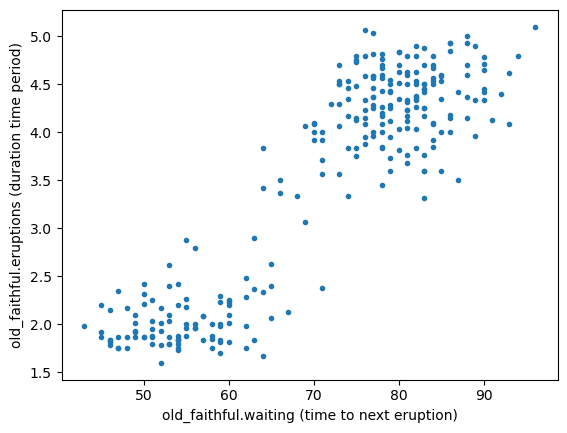

In [2]:
# The remainder of the midterm exam will be
# based on the classic "Old Faithful" dataset

old_faithful = pd.read_csv("https://gist.githubusercontent.com/curran/4b59d1046d9e66f2787780ad51a1cd87/raw/9ec906b78a98cf300947a37b56cfe70d01183200/data.tsv", sep="\t")
print("n", old_faithful.shape, "variables")
plt.plot(old_faithful.waiting, old_faithful.eruptions, '.')
plt.xlabel("old_faithful.waiting (time to next eruption)")
plt.ylabel("old_faithful.eruptions (duration time period)");

---

### Recall the normal-gamma specification 

$$\scriptsize
\begin{align*}
p(\theta,\tau|x) &\propto{} p(\theta,\tau,x) = p(x|\theta)p(\theta)p(\tau) \quad (\theta \perp\!\!\perp \tau) \leftarrow \text{independent priors} & p(\theta|x,\theta_0,\tau_0, \tau) &={} \text{N}\left(\frac{\left(\tau_0 \theta_0+\tau\sum_{i=1}^{n}x_{i}\right)}{(\tau_0+n\tau)}, \sigma^{-2}=\tau_0+n\tau \right)\\
&={}  \left[\prod_{i=1}^n\sqrt{\frac{\tau}{2\pi}} e^{-\frac{\tau\left(x_i-\theta\right)^2}{2}}\right] \sqrt{\frac{\tau_0}{2\pi}} e^{-\frac{\tau_0\left(\theta-\theta_0\right)^2}{2}} \frac{\beta ^{\alpha}}{\Gamma(\alpha)} \tau^{\frac{\alpha}{2} -1}e^{-\frac{\beta}{2} \tau} & p(\tau|x, \alpha, \beta, \theta) &={} \text{Gamma}\left(\frac{\alpha}{2}+\frac{n}{2}, \frac{1}{2}\beta+\frac{1}{2}\sum_{i=1}^n\left(x_i-\theta\right)^2 \right)
\end{align*}$$

### And consider the following specification for the Old Faithful data above

$
\begin{align}
\textrm{For $i$ in } 1,\cdots, n &={} 272\\
\textrm{Let unobserved $u_i=1$ indicate the long time group} & \quad \textrm{so the data point belongs to upper right cluster of data}\\
\textrm{and unobserved $u_i=0$ indicate the short time group} & \quad  \textrm{so the data point belongs to bottom left cluster of data}\\
u_i &\sim{} \textrm{Bernoulli}(p) \\
p &\sim{} \textrm{beta}(\alpha_0=1,\beta_0=1)\\
\textrm{Let waiting duration} & \\
w_i &\sim{} N\big((1-u_i)\times \theta_{w0} + u_i \times \theta_{w1}, \tau_w\big) \\
\theta_{w0} &\sim{} N\big(\mu_{w0}=55, \tau_{w0}=1/5^2 \big) & \\
\theta_{w1} &\sim{} N\big(\mu_{w1}=85, \tau_{w1}=1/5^2 \big) & \\
\tau_w  &\sim{} \textrm{Gamma}\left(\alpha=\frac{1}{2}, \beta=\frac{1}{2}10^2\right)\\
\textrm{and eruption duration} & \\
y_i &\sim{} N\big((1-u_i)\times \theta_{y0} + u_i \times \theta_{y1}, \tau_y\big) & \\
\theta_{y0} &\sim{} N\big(\mu_{y0}=2.0, \tau_{y0}=1/0.5^2 \big) & \\
\theta_{y1} &\sim{} N\big(\mu_{y1}=4.5, \tau_{y1}=1/0.5^2 \big) & \\
\tau_y  &\sim{} \textrm{Gamma}\left(\alpha=\frac{1}{2}, \beta=\frac{1}{2}1^2\right)\\
\end{align}
$

## Part 2 (20%): Complete the specification above using PyMC
- Use one beta distribution
- Use one Bernoulli distribution with `shape=272`
- Use four normal distributions for the location $\theta$ parameters, each with `shape=1`
- Use two gamma distributions for the precision $\tau$ parameters, each with `shape=1`
- Use two normal distributions for the two observation columns (as given below)

In [26]:
import pymc as pm
import numpy as np
import pandas as pd

# Load the Old Faithful data
old_faithful = pd.read_csv(
    "https://gist.githubusercontent.com/curran/"
    "4b59d1046d9e66f2787780ad51a1cd87/raw/"
    "9ec906b78a98cf300947a37b56cfe70d01183200/data.tsv",
    sep="\t"
)
n = old_faithful.shape[0]  # 272
w_data = old_faithful["waiting"].values
y_data = old_faithful["eruptions"].values

with pm.Model() as OldFaithful:
    # 1) p ~ Beta(1,1)
    p = pm.Beta("p", alpha=1, beta=1)

    # 2) u ~ Bernoulli(p), shape=272
    u = pm.Bernoulli("u", p=p, shape=n)

    # 3) Four Normal location parameters, each shape=1
    #    theta_w0, theta_w1 ~ Normal(mu=?, tau=?)
    theta_w0 = pm.Normal("theta_w0", mu=55, tau=1/(5**2), shape=1)
    theta_w1 = pm.Normal("theta_w1", mu=85, tau=1/(5**2), shape=1)

    theta_y0 = pm.Normal("theta_y0", mu=2.0,  tau=1/(0.5**2), shape=1)
    theta_y1 = pm.Normal("theta_y1", mu=4.5,  tau=1/(0.5**2), shape=1)

    # 4) Two Gamma precision parameters, each shape=1
    #    tau_w ~ Gamma(alpha=0.5, beta=0.5*10^2)
    #    tau_y ~ Gamma(alpha=0.5, beta=0.5*1^2)
    tau_w = pm.Gamma("tau_w", alpha=0.5, beta=0.5*(10**2), shape=1)
    tau_y = pm.Gamma("tau_y", alpha=0.5, beta=0.5*(1**2),  shape=1)

    # 5) Two Normal observation models (likelihoods), one for w_i, one for y_i
    #    w_i ~ N( (1-u_i)*theta_w0 + u_i*theta_w1, tau_w )
    #    y_i ~ N( (1-u_i)*theta_y0 + u_i*theta_y1, tau_y )
    #
    #    Note:  (1-u) and u are shape=(272,), each theta is shape=(1,)
    #    so they broadcast to shape=(272,).
    mean_w = (1 - u) * theta_w0 + u * theta_w1
    mean_y = (1 - u) * theta_y0 + u * theta_y1

    obs_w = pm.Normal("obs_w", mu=mean_w, tau=tau_w, observed=w_data)
    obs_y = pm.Normal("obs_y", mu=mean_y, tau=tau_y, observed=y_data)

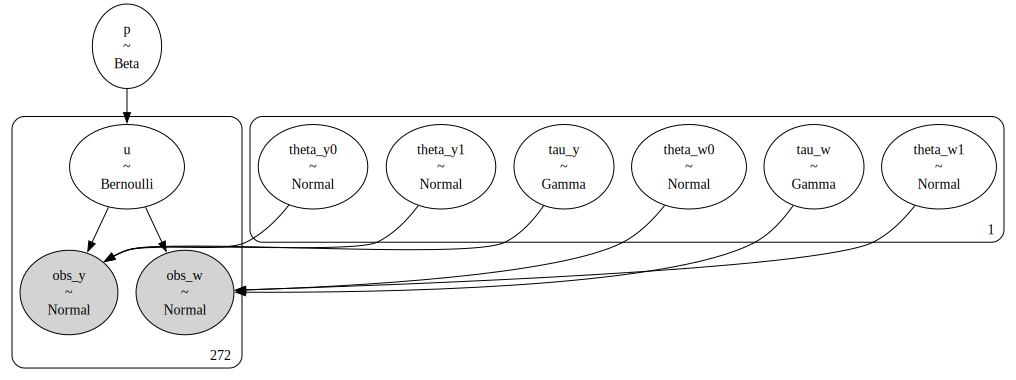

In [27]:
pymc.model_to_graphviz(OldFaithful)

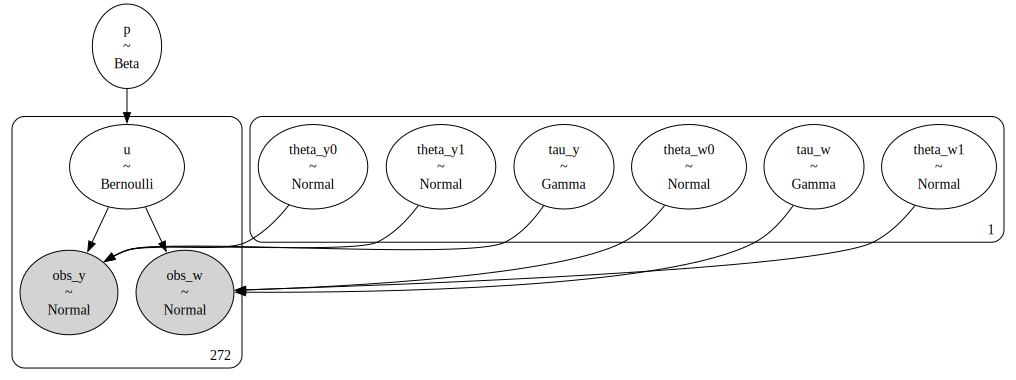

In [28]:
# You can compare the above to this cell to confirm the correctness of your setup 
pymc.model_to_graphviz(OldFaithful)

In [ ]:
with OldFaithful:
    v1_fit = pymc.sample()

# The error below is a result of no variation in some of the u_i
# which indicates that we do not believe there is any uncertainty in these u_i

# RuntimeWarning: invalid value encountered in scalar divide
# (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples) 


(4, 1000, 272)


array([[0.      , 0.      , 0.000999, ..., 0.      , 0.      , 0.      ],
       [0.      , 0.      , 0.000999, ..., 0.      , 0.      , 0.      ],
       [0.      , 0.      , 0.      , ..., 0.      , 0.      , 0.      ],
       [0.      , 0.      , 0.      , ..., 0.      , 0.      , 0.      ]])

array([[1.   , 0.   , 0.999, ..., 1.   , 0.   , 1.   ],
       [1.   , 0.   , 0.999, ..., 1.   , 0.   , 1.   ],
       [1.   , 0.   , 1.   , ..., 1.   , 0.   , 1.   ],
       [1.   , 0.   , 1.   , ..., 1.   , 0.   , 1.   ]])

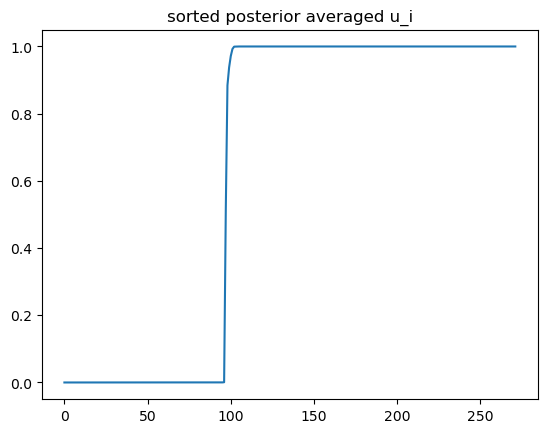

In [38]:
print(v1_fit.posterior.u.shape)
display(v1_fit.posterior.u.values.var(axis=1))
display(v1_fit.posterior.u.values.mean(axis=1))
plt.plot(sorted(v1_fit.posterior.u.values.mean(axis=1).mean(axis=0)))
plt.title("sorted posterior averaged u_i");

In [39]:
dir(OldFaithful)
OldFaithful.named_vars.keys()

dict_keys(['p', 'u', 'theta_w0', 'theta_w1', 'theta_y0', 'theta_y1', 'tau_w', 'tau_y', 'obs_w', 'obs_y'])

In [40]:
# You can compare the above to this cell to confirm the correctness of your setup 
dir(OldFaithful)
OldFaithful.named_vars.keys()

dict_keys(['p', 'u', 'theta_w0', 'theta_w1', 'theta_y0', 'theta_y1', 'tau_w', 'tau_y', 'obs_w', 'obs_y'])

In [35]:
az.summary(v1_fit, var_names=['p', 
                              'theta_w0', 'theta_w1', 
                              'theta_y0', 'theta_y1', 
                              'tau_w', 'tau_y'])

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
p,0.640,0.030,0.582,0.693,0.000,0.000,5856.0,3297.0,1.0
theta_w0[0],54.606,0.600,53.504,55.744,0.008,0.006,5433.0,3390.0,1.0
theta_w1[0],80.074,0.460,79.238,80.980,0.007,0.005,4804.0,3407.0,1.0
theta_y0[0],2.046,0.037,1.977,2.115,0.001,0.000,4644.0,3376.0,1.0
theta_y1[0],4.296,0.029,4.242,4.350,0.000,0.000,4668.0,3466.0,1.0
tau_w[0],0.028,0.002,0.024,0.033,0.000,0.000,4315.0,3207.0,1.0
tau_y[0],7.280,0.631,6.101,8.462,0.008,0.006,5736.0,3396.0,1.0


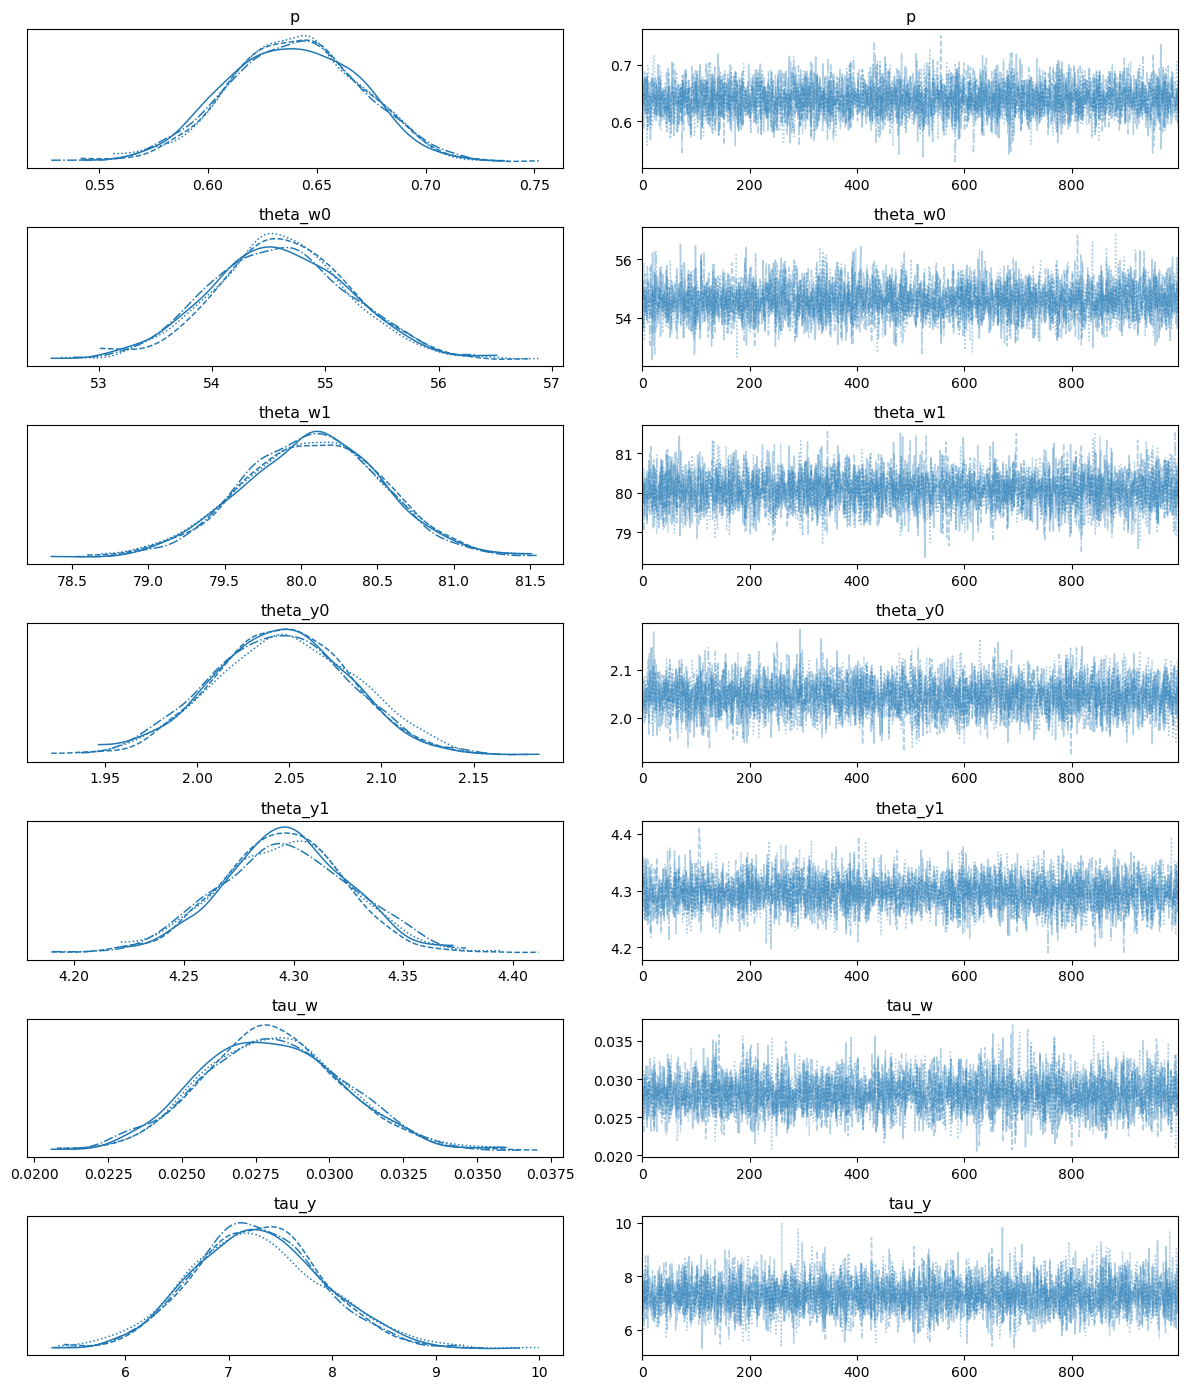

In [44]:
az.plot_trace(v1_fit, var_names=['p', 
                               'theta_w0', 'theta_w1', 
                               'theta_y0', 'theta_y1', 
                               'tau_w', 'tau_y'])
plt.tight_layout()

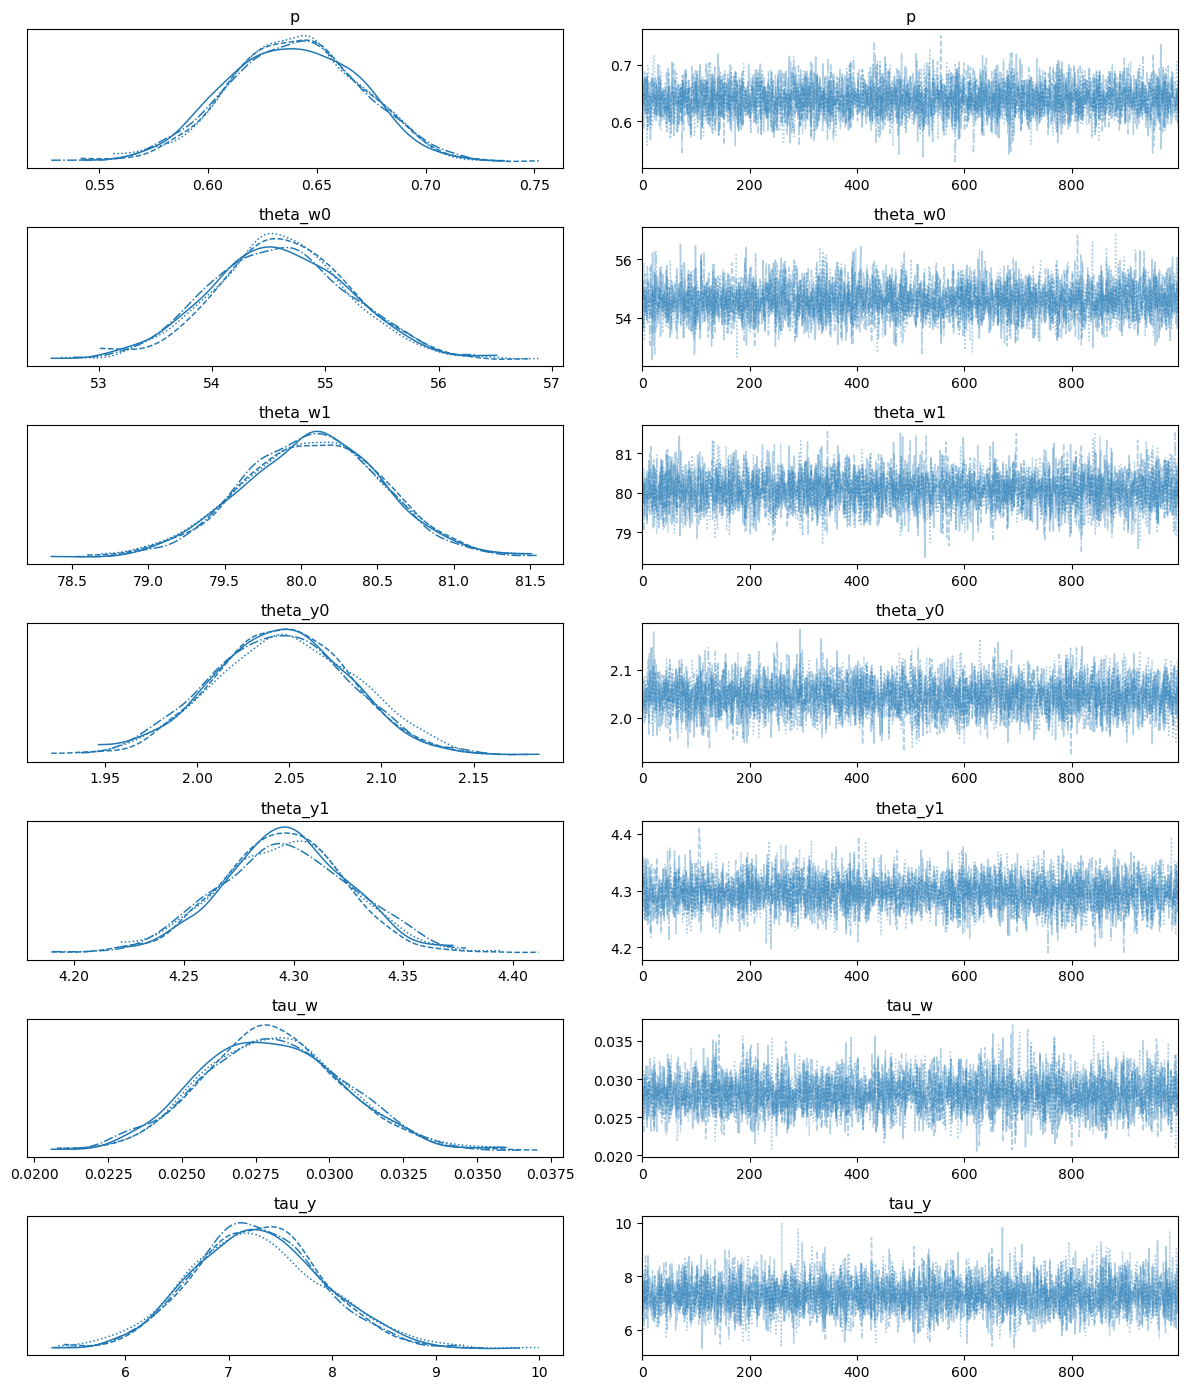

In [37]:
# You can compare the above to this cell to confirm the correctness of your setup 
# Does not look at u since there are too many for the output to be meaningful
az.plot_trace(v1_fit, var_names=['p', 
                                 'theta_w0', 'theta_w1', 
                                 'theta_y0', 'theta_y1', 
                                 'tau_w', 'tau_y'])
plt.tight_layout()    

## Part 3 (20%): Complete the specification above using PyMC again

- Use one beta distribution
- Use one Bernoulli distribution with `shape=272`
- Now use two (not four) normal distributions for the location $\theta$ parameters
    - based on using `mu=[55,85]` and `mu=[2,4.5]` (which will make each have `shape=2` by default), and `tau=1/25` and `tau=1/0.5**2`, respectively 
- Use one gamma distribution for the precision $\tau$ parameters
    - based on using `beta=[(1/10**2)/2, 1/2]` and `alpha=1/2` (which will make the distribution have `shape=2` by default)
- Use two normal distributions for the two observation columns (as suggested below)
    - based on using `theta_w[u]` and `tau=tau[0]` and `theta_w[u]` and `tau=tau[0]`

In [16]:
import pymc as pm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import arviz as az

# 1) Load the data
old_faithful = pd.read_csv(
    "https://gist.githubusercontent.com/curran/"
    "4b59d1046d9e66f2787780ad51a1cd87/raw/"
    "9ec906b78a98cf300947a37b56cfe70d01183200/data.tsv",
    sep="\t"
)
w_data = old_faithful["waiting"].values     # length = 272
y_data = old_faithful["eruptions"].values   # length = 272
n = len(w_data)

# 2) Build the PyMC model
with pm.Model() as OldFaithful2:

    # (a) p ~ Beta(1,1)
    p = pm.Beta("p", alpha=1, beta=1)

    # (b) u ~ Bernoulli(p)  (shape=272)
    u = pm.Bernoulli("u", p=p, shape=n)

    # (c) theta_w, shape=2, with mu=[55,85] and tau=1/25
    #     => so each component has prior N( mu=55 or 85, tau=1/25 )
    theta_w = pm.Normal("theta_w", mu=[55, 85], tau=1/25, shape=2)

    # (d) theta_y, shape=2, with mu=[2,4.5] and tau=1/(0.5^2)=4
    theta_y = pm.Normal("theta_y", mu=[2, 4.5], tau=4, shape=2)

    # (e) tau, shape=2, with alpha=1/2 and beta=[(1/10^2)/2, 1/2]
    #     => tau[0] used for waiting times, tau[1] used for eruption times
    #     => CAREFUL: "beta" in PyMC is the "rate" parameter, so that
    #        Gamma(alpha, beta) has mean = alpha/beta.  Here we mimic
    #        the question's suggestion "beta=[(1/10^2)/2, 1/2]".
    #        So tau[0] ~ Gamma( alpha=1/2, rate=(1/10^2)/2 )
    #        and tau[1] ~ Gamma( alpha=1/2, rate=1/2 )
    tau = pm.Gamma("tau", alpha=0.5, beta=[(1/(10**2))/2, 0.5], shape=2)

    # (f) Two Normal likelihoods:
    #     w_i ~ N( theta_w[u_i], tau[0] )
    #     y_i ~ N( theta_y[u_i], tau[1] )
    #
    #    'theta_w[u]' picks out either theta_w[0] or theta_w[1] for each i
    #    depending on whether u[i] is 0 or 1
    obs_w = pm.Normal("obs_w", mu=theta_w[u], tau=tau[0], observed=w_data)
    obs_y = pm.Normal("obs_y", mu=theta_y[u], tau=tau[1], observed=y_data)


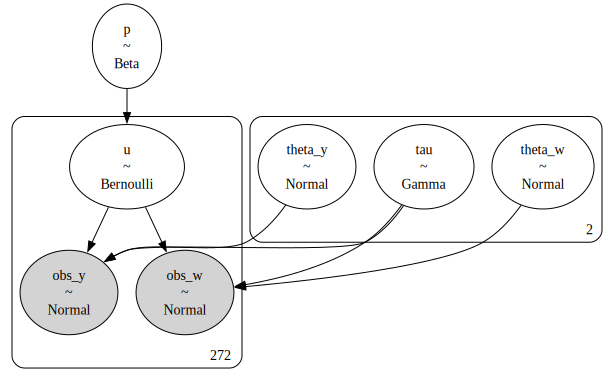

In [17]:
pymc.model_to_graphviz(OldFaithful2)

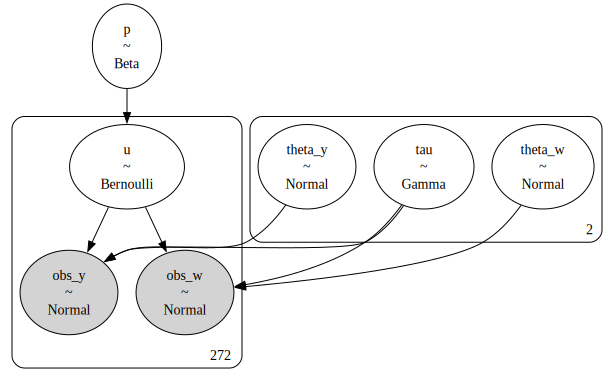

In [18]:
# You can compare the above to this cell to confirm the correctness of your setup 
pymc.model_to_graphviz(OldFaithful2)

In [19]:
with OldFaithful2:
    v2_fit = pymc.sample()


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [p, theta_w, theta_y, tau]
>BinaryGibbsMetropolis: [u]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 43 seconds.
/opt/conda/lib/python3.11/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)


In [20]:
dir(OldFaithful2)
OldFaithful2.named_vars.keys()

dict_keys(['p', 'u', 'theta_w', 'theta_y', 'tau', 'obs_w', 'obs_y'])

In [21]:
# You can compare the above to this cell to confirm the correctness of your setup 
dir(OldFaithful2)
OldFaithful2.named_vars.keys()

dict_keys(['p', 'u', 'theta_w', 'theta_y', 'tau', 'obs_w', 'obs_y'])

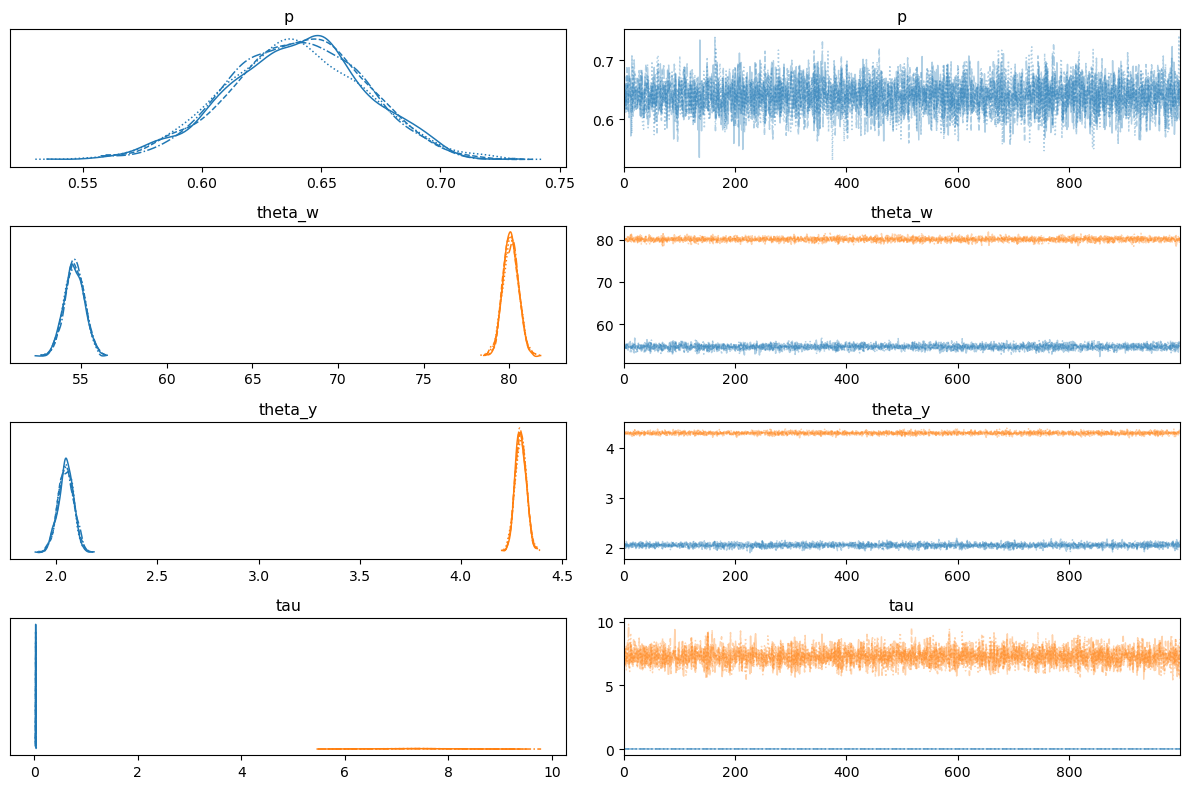

In [22]:
az.plot_trace(v2_fit, var_names=['p', 'theta_w', 'theta_y', 'tau'])
plt.tight_layout()

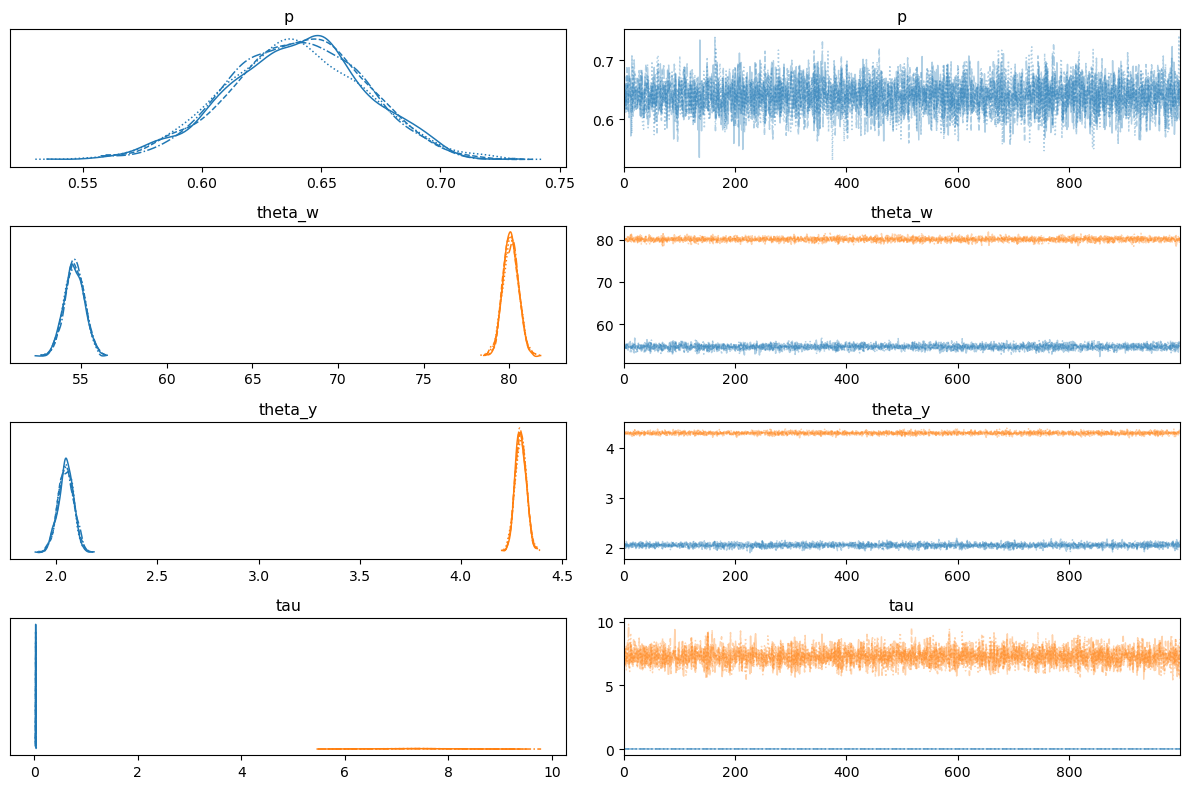

In [23]:
# You can compare the above to this cell to confirm the correctness of your setup 
az.plot_trace(v2_fit, var_names=['p', 'theta_w', 'theta_y', 'tau'])
plt.tight_layout()

In [24]:
az.summary(v2_fit, var_names=['p', 'theta_w', 'theta_y', 'tau'])


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
p,0.640,0.029,0.587,0.694,0.000,0.000,5061.0,3528.0,1.0
theta_w[0],54.606,0.587,53.576,55.790,0.009,0.006,4681.0,2944.0,1.0
theta_w[1],80.082,0.458,79.280,80.951,0.007,0.005,4966.0,3033.0,1.0
theta_y[0],2.047,0.039,1.976,2.122,0.001,0.000,5403.0,3309.0,1.0
theta_y[1],4.296,0.028,4.243,4.348,0.000,0.000,5523.0,3646.0,1.0
tau[0],0.028,0.002,0.024,0.033,0.000,0.000,5837.0,3092.0,1.0
tau[1],7.275,0.630,6.030,8.396,0.008,0.006,5614.0,3225.0,1.0


In [25]:
az.summary(v1_fit, var_names=['p', 
                              'theta_w0', 'theta_w1', 
                              'theta_y0', 'theta_y1', 
                              'tau_w', 'tau_y'])

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
p,0.640,0.029,0.589,0.697,0.000,0.000,6405.0,3112.0,1.0
theta_w0,54.582,0.606,53.424,55.687,0.009,0.006,4945.0,3192.0,1.0
theta_w1,80.086,0.445,79.218,80.878,0.006,0.004,5399.0,3371.0,1.0
theta_y0,2.046,0.039,1.973,2.120,0.001,0.000,4269.0,2973.0,1.0
theta_y1,4.297,0.028,4.245,4.348,0.000,0.000,4775.0,3104.0,1.0
tau_w,0.028,0.002,0.023,0.033,0.000,0.000,5689.0,3490.0,1.0
tau_y,7.294,0.647,6.078,8.486,0.009,0.007,5001.0,3239.0,1.0



## Part 4:<br>Complete the same specification using Python<br>as a Gibbs sampler with known full conditionals

$
\begin{align}
\textrm{For $i$ in } 1,\cdots, n &={} 272\\
\textrm{Let unobserved $u_i=1$ indicate the long time group} & \quad \textrm{so the data point belongs to upper right cluster of data}\\
\textrm{and unobserved $u_i=0$ indicate the short time group} & \quad  \textrm{so the data point belongs to bottom left cluster of data}\\
u_i &\sim{} \textrm{Bernoulli}(p) \\
p &\sim{} \textrm{beta}(\alpha_0=1,\beta_0=1)\\
\textrm{Let waiting duration} & \\
w_i &\sim{} N\big((1-u_i)\times \theta_{w0} + u_i \times \theta_{w1}, \tau_w\big) \\
\theta_{w0} &\sim{} N\big(\mu_{w0}=55, \tau_{w0}=1/5^2 \big) & \\
\theta_{w1} &\sim{} N\big(\mu_{w1}=85, \tau_{w1}=1/5^2 \big) & \\
\tau_w  &\sim{} \textrm{Gamma}\left(\alpha=\frac{1}{2}, \beta=\frac{1}{2}10^2\right)\\
\textrm{and eruption duration} & \\
y_i &\sim{} N\big((1-u_i)\times \theta_{y0} + u_i \times \theta_{y1}, \tau_y\big) & \\
\theta_{y0} &\sim{} N\big(\mu_{y0}=2.0, \tau_{y0}=1/0.5^2 \big) & \\
\theta_{y1} &\sim{} N\big(\mu_{y1}=4.5, \tau_{y1}=1/0.5^2 \big) & \\
\tau_y  &\sim{} \textrm{Gamma}\left(\alpha=\frac{1}{2}, \beta=\frac{1}{2}1^2\right)\\
\end{align}
$

## Part 4A (10%): Getting $u$ and $p$ from the Joint

$
\begin{align}
\prod_{i=1}^n N(w_i|\theta_{w1},\tau_{w})^{u_i}N(w_i|\theta_{w0},\tau_{w})^{1-u_i} N(y_i|\theta_{y1},\tau_{y})^{u_i}N(w_i|\theta_{y0},\tau_{y})^{1-u_i} &\longleftarrow{} \textrm{likelihood}\\ 
\times  \prod_{i=1}^n p^{u_i} (1-p)^{1-u_i} \times p(p)p(\theta_{w0})p(\theta_{w1})p(\tau_{w})p(\theta_{y0})p(\theta_{y1})p(\tau_{y}) &\longleftarrow{} \textrm{priors}
\end{align}$

$
\begin{align}
\Pr(u_i = 1 | - ) &\propto{} N(w_i|\theta_{w1},\tau_{w}) N(y_i|\theta_{y1},\tau_{y})p\\
\Pr(u_i = 0 | - ) &\propto{} N(w_i|\theta_{w0},\tau_{w}) N(y_i|\theta_{y0},\tau_{y})(1-p)\\
\Pr(u_i = u | - ) &={} \frac{\Pr(u_i = u | - )}{\sum_j \Pr(u_i = u_j | - )}
\end{align}$



In [ ]:
# Hint
stats.bernoulli(stats.beta(1,1).rvs(10)).rvs()

In [ ]:
# Note
# .rvs(size) gives an array while .rvs() gives a scalar
# unless parameter is a vector (as demonstrated above)
stats.beta(1,1).rvs(2), stats.beta(1,1).rvs(size=1), stats.beta(1,1).rvs() 

In [47]:
n = 272
G = 100

thetas_w_tau0 = 1/5**2
# Don't change these for Part4A: keep them set as given
thetas_w_mu0 = np.array([54.596, 80.069])  # posterior means from a previous run
thetas_w = np.zeros((2,G)) + thetas_w_mu0.reshape(2,1)

thetas_y_tau0 = 1/0.5**2
# Don't change these for Part4A: keep them set as given
thetas_y_mu0 = np.array([2.046, 4.297])  # posterior means from a previous run
thetas_y = np.zeros((2,G)) + thetas_y_mu0.reshape(2,1)

taus_alpha = 1
taus_beta = np.array([10**2, 1**2])  
# Don't change these for Part4A: keep them set as given
# posterior means from a previous run
taus = np.zeros((2,G)) + np.array([0.028, 7.515]).reshape(2,1)

us = np.zeros((n,G))
ps = np.zeros(G)+0.5

for g in range(1,G):
    
    # 1) Update each u_i ~ Bernoulli( prob(u_i=1|...) )
    p_curr = ps[g-1]
    w0, w1 = thetas_w[0, g-1], thetas_w[1, g-1]
    y0, y1 = thetas_y[0, g-1], thetas_y[1, g-1]
    tau_w, tau_y = taus[0, g-1], taus[1, g-1]

    # Compute Normal PDF values for each data point under "cluster 0" vs. "cluster 1"
    # (Remember: tau is precision => stdev = sqrt(1./tau).)
    p1_vec = (stats.norm.pdf(w_data, loc=w1, scale=np.sqrt(1./tau_w)) *
              stats.norm.pdf(y_data, loc=y1, scale=np.sqrt(1./tau_y)) *
              p_curr)
    p0_vec = (stats.norm.pdf(w_data, loc=w0, scale=np.sqrt(1./tau_w)) *
              stats.norm.pdf(y_data, loc=y0, scale=np.sqrt(1./tau_y)) *
              (1. - p_curr))

    # Probability that u_i=1:
    denom = p1_vec + p0_vec
    p_u_is_1 = np.where(denom>0, p1_vec / denom, 0.5)  # guard against potential 0/0

    # Sample each u_i from Bernoulli(p_u_is_1)
    us[:, g] = stats.bernoulli.rvs(p_u_is_1)

    # 2) Update p ~ Beta( alpha=1 + #u=1, beta=1 + #u=0 )
    num_ones = us[:,g].sum()
    ps[g] = stats.beta.rvs(1 + num_ones, 1 + (n - num_ones))

    # Don't change these for Part4A:  
    # keep them set as the posterior means given above
    thetas_w
    thetas_y
    taus



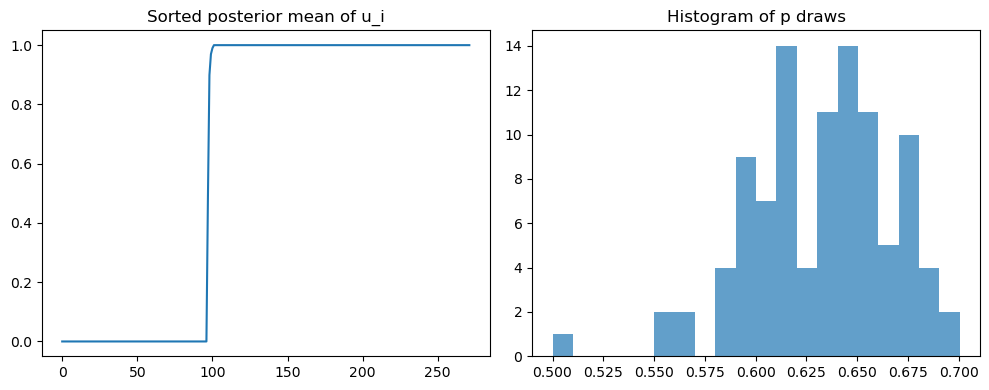

In [46]:
# Hint: does this look right?
fig, ax = plt.subplots(1, 2, figsize=(10,4))
ax[0].plot(sorted(us[:,1:].mean(axis=1)))
ax[0].set_title("Sorted posterior mean of u_i")
ax[1].hist(ps, bins=20, alpha=0.7)
ax[1].set_title("Histogram of p draws")
plt.tight_layout()
plt.show()

## Part 4B (10%): Getting $\theta_w$ and $\theta_y$ from the Joint

$
\begin{align}
\prod_{i=1}^n N(w_i|\theta_{w1},\tau_{w})^{u_i}N(w_i|\theta_{w0},\tau_{w})^{1-u_i} N(y_i|\theta_{y1},\tau_{y})^{u_i}N(w_i|\theta_{y0},\tau_{y})^{1-u_i} &\longleftarrow{} \textrm{likelihood}\\ 
\times  \prod_{i=1}^n p^{u_i} (1-p)^{1-u_i} \times p(p)p(\theta_{w0})p(\theta_{w1})p(\tau_{w})p(\theta_{y0})p(\theta_{y1})p(\tau_{y}) &\longleftarrow{} \textrm{priors}
\end{align}$


$$\scriptsize
\begin{align*}
p(\theta,\tau|x) &\propto{} p(\theta,\tau,x) = p(x|\theta)p(\theta)p(\tau) \quad (\theta \perp\!\!\perp \tau) \leftarrow \text{independent priors} & p(\theta|x,\theta_0,\tau_0, \tau) &={} \text{N}\left(\frac{\left(\tau_0 \theta_0+\tau\sum_{i=1}^{n}x_{i}\right)}{(\tau_0+n\tau)}, \sigma^{-2}=\tau_0+n\tau \right)\\
&={}  \left[\prod_{i=1}^n\sqrt{\frac{\tau}{2\pi}} e^{-\frac{\tau\left(x_i-\theta\right)^2}{2}}\right] \sqrt{\frac{\tau_0}{2\pi}} e^{-\frac{\tau_0\left(\theta-\theta_0\right)^2}{2}} \frac{\beta ^{\alpha}}{\Gamma(\alpha)} \tau^{\frac{\alpha}{2} -1}e^{-\frac{\beta}{2} \tau} & p(\tau|x, \alpha, \beta, \theta) &={} \text{Gamma}\left(\frac{\alpha}{2}+\frac{n}{2}, \frac{1}{2}\beta+\frac{1}{2}\sum_{i=1}^n\left(x_i-\theta\right)^2 \right)\\{}\\
\end{align*}$$

In [48]:
n = 272
G = 100

thetas_w_mu0 = np.array([55,85])
thetas_w = np.zeros((2,G)) + thetas_w_mu0.reshape(2,1)
thetas_w_tau0 = 1/5**2

thetas_y_mu0 = np.array([2.0,4.5])
thetas_y = np.zeros((2,G)) + thetas_y_mu0.reshape(2,1)
thetas_y_tau0 = 1/0.5**2

taus_alpha = 1
taus_beta = np.array([10**2, 1**2])  
# Don't change these for Part4A: keep them set as given
# posterior means from a previous run
taus = np.zeros((2,G)) + np.array([0.028, 7.515]).reshape(2,1)

us = np.zeros((n,G))
ps = np.zeros(G)+0.5

for g in range(1,G):
    
    # Don't change these for Part4B:  
    # confirm theta updates are working by leaving this as is
    us[:,g] = stats.bernoulli(0.5).rvs(n)
    
    # Don't change these for Part4B:  
    # confirm theta updates are working by leaving this as is
    ps[g] = stats.beta(1,1).rvs()
    
    # 1) theta_w0 : waiting times for cluster 0
    w0_data = w_data[us[:, g] == 0]
    n0 = len(w0_data)
    sum0 = w0_data.sum()

    tau_w = taus[0, g-1]  # "posterior mean" but not updated
    post_precision = thetas_w_tau0 + n0 * tau_w
    post_mean = (thetas_w_tau0 * thetas_w_mu0[0] + tau_w * sum0) / post_precision

    thetas_w[0, g] = stats.norm.rvs(loc=post_mean, scale=np.sqrt(1.0 / post_precision))

    # 2) theta_w1 : waiting times for cluster 1
    w1_data = w_data[us[:, g] == 1]
    n1 = len(w1_data)
    sum1 = w1_data.sum()

    post_precision = thetas_w_tau0 + n1 * tau_w
    post_mean = (thetas_w_tau0 * thetas_w_mu0[1] + tau_w * sum1) / post_precision

    thetas_w[1, g] = stats.norm.rvs(loc=post_mean, scale=np.sqrt(1.0 / post_precision))

    # 3) theta_y0 : eruption times for cluster 0
    y0_data = y_data[us[:, g] == 0]
    n0y = len(y0_data)
    sum0y = y0_data.sum()

    tau_y = taus[1, g-1]
    post_precision = thetas_y_tau0 + n0y * tau_y
    post_mean = (thetas_y_tau0 * thetas_y_mu0[0] + tau_y * sum0y) / post_precision

    thetas_y[0, g] = stats.norm.rvs(loc=post_mean, scale=np.sqrt(1.0 / post_precision))

    # 4) theta_y1 : eruption times for cluster 1
    y1_data = y_data[us[:, g] == 1]
    n1y = len(y1_data)
    sum1y = y1_data.sum()

    post_precision = thetas_y_tau0 + n1y * tau_y
    post_mean = (thetas_y_tau0 * thetas_y_mu0[1] + tau_y * sum1y) / post_precision

    thetas_y[1, g] = stats.norm.rvs(loc=post_mean, scale=np.sqrt(1.0 / post_precision))

    # (tau_w, tau_y) are not updated here, so we do nothing with taus[:,g].

    # Don't change these for Part4B:  
    # keep them set as the posterior means given above
    taus
    

In [49]:
# Hint: does this look right?
thetas_w[:,1:].mean(axis=1), old_faithful.waiting.mean()

(array([70.65179765, 71.09743785]), 70.8970588235294)

In [50]:
# Hint: does this look right?
thetas_y[:,1:].mean(axis=1), old_faithful.eruptions.mean()

(array([3.47162901, 3.49615167]), 3.4877830882352936)

## Part 4C (10%): Getting $\tau$ from the Joint

$
\begin{align}
\prod_{i=1}^n N(w_i|\theta_{w1},\tau_{w})^{u_i}N(w_i|\theta_{w0},\tau_{w})^{1-u_i} N(y_i|\theta_{y1},\tau_{y})^{u_i}N(w_i|\theta_{y0},\tau_{y})^{1-u_i} &\longleftarrow{} \textrm{likelihood}\\ 
\times  \prod_{i=1}^n p^{u_i} (1-p)^{1-u_i} \times p(p)p(\theta_{w0})p(\theta_{w1})p(\tau_{w})p(\theta_{y0})p(\theta_{y1})p(\tau_{y}) &\longleftarrow{} \textrm{priors}
\end{align}$


$$\scriptsize
\begin{align*}
p(\theta,\tau|x) &\propto{} p(\theta,\tau,x) = p(x|\theta)p(\theta)p(\tau) \quad (\theta \perp\!\!\perp \tau) \leftarrow \text{independent priors} & p(\theta|x,\theta_0,\tau_0, \tau) &={} \text{N}\left(\frac{\left(\tau_0 \theta_0+\tau\sum_{i=1}^{n}x_{i}\right)}{(\tau_0+n\tau)}, \sigma^{-2}=\tau_0+n\tau \right)\\
&={}  \left[\prod_{i=1}^n\sqrt{\frac{\tau}{2\pi}} e^{-\frac{\tau\left(x_i-\theta\right)^2}{2}}\right] \sqrt{\frac{\tau_0}{2\pi}} e^{-\frac{\tau_0\left(\theta-\theta_0\right)^2}{2}} \frac{\beta ^{\alpha}}{\Gamma(\alpha)} \tau^{\frac{\alpha}{2} -1}e^{-\frac{\beta}{2} \tau} & p(\tau|x, \alpha, \beta, \theta) &={} \text{Gamma}\left(\frac{\alpha}{2}+\frac{n}{2}, \frac{1}{2}\beta+\frac{1}{2}\sum_{i=1}^n\left(x_i-\theta\right)^2 \right)\\{}\\
\end{align*}$$

In [55]:
n = 272
G = 100

thetas_w_tau0 = 1/5**2
# Don't change these for Part4C: keep them set as given
thetas_w_mu0 = np.array([54.596, 80.069])  # posterior means from a previous run
thetas_w = np.zeros((2,G)) + thetas_w_mu0.reshape(2,1)

thetas_y_tau0 = 1/0.5**2
# Don't change these for Part4C: keep them set as given
thetas_y_mu0 = np.array([2.046, 4.297])  # posterior means from a previous run
thetas_y = np.zeros((2,G)) + thetas_y_mu0.reshape(2,1)

taus_alpha = 1
taus_beta = np.array([10**2, 1**2])
taus = np.zeros((2,G)) + taus_alpha/taus_beta.reshape(2,1)

us = np.zeros((n,G))
ps = np.zeros(G)+0.5

for g in range(1,G):
    
    # For Part4C...
    # Feel free to change this in any manner you wish
    # to help confirm that your tau update is working 
    us[:,g] = stats.bernoulli(0.5).rvs(n)
    
    # For Part4C...
    # Feel free to change this in any manner you wish
    # to help confirm that your tau update is working 
    ps[g] = stats.beta(1,1).rvs()

    # Don't change these for now just keep them fixed on the given
    # posterior means from a previous run 
    thetas_w
    thetas_y
    
    # 1) Update tau_w (taus[0,g]) from its Gamma full conditional
    #    We have: w_i ~ Normal( mean=thetas_w[u_i,g], precision=tau_w ).
    #    So sum of squares = sum_{i=1..n} [w_i - thetas_w[u_i,g]]^2
    #    Posterior shape = alpha + n/2
    #    Posterior rate  = beta + 0.5 * sum_of_squares

    # shape param
    alpha_post_w = taus_alpha + n/2
    # sum of squares (with cluster assignment from us[:,g])
    sum_of_squares_w = 0.0
    us = np.zeros((n, G), dtype=int)
    for i in range(n):
        c = us[i,g]  # cluster index (0 or 1)
        resid = w_data[i] - thetas_w[c,g]
        sum_of_squares_w += resid**2

    beta_post_w = taus_beta[0] + 0.5 * sum_of_squares_w

    # Sample from Gamma(shape=alpha_post_w, rate=beta_post_w)
    # In scipy: gamma.rvs(a=shape, scale=1/rate)
    taus[0,g] = stats.gamma.rvs(a=alpha_post_w, scale=1.0/beta_post_w)

    # 2) Update tau_y (taus[1,g])
    alpha_post_y = taus_alpha + n/2
    sum_of_squares_y = 0.0
    for i in range(n):
        c = us[i,g]
        resid = y_data[i] - thetas_y[c,g]
        sum_of_squares_y += resid**2
    beta_post_y = taus_beta[1] + 0.5 * sum_of_squares_y

    taus[1,g] = stats.gamma.rvs(a=alpha_post_y, scale=1.0/beta_post_y)
    

In [56]:
# Hint: does this look right?
taus[:,1:].mean(axis=1), 1/old_faithful.waiting.var(), 1/old_faithful.eruptions.var()

(array([0.00225832, 0.29944176]), 0.005410572872442254, 0.7676197521648221)

## Part 4D (10%): Complete Gibbs Sampler


In [59]:
n = 272
G = 100

thetas_w_mu0 = np.array([55,85])
thetas_w = np.zeros((2,G)) + thetas_w_mu0.reshape(2,1)
thetas_w_tau0 = 1/5**2

thetas_y_mu0 = np.array([2.0,4.5])
thetas_y = np.zeros((2,G)) + thetas_y_mu0.reshape(2,1)
thetas_y_tau0 = 1/0.5**2

taus_alpha = 1
taus_beta = np.array([10**2, 1**2])
taus = np.zeros((2,G)) + taus_alpha/taus_beta.reshape(2,1)

us = np.zeros((n,G))
ps = np.zeros(G)+0.5

us[:, 0] = stats.bernoulli(0.5).rvs(size=n).astype(int)

for g in range(1,G):
    
     #==================================================================
    # (A) Update each u_i
    #==================================================================
    # prob that u_i=1 is proportional to:
    #    p * N(w_i | theta_w1, tau_w) * N(y_i | theta_y1, tau_y)
    # likewise for u_i=0.
    p_curr = ps[g-1]
    w0, w1 = thetas_w[0, g-1], thetas_w[1, g-1]
    y0, y1 = thetas_y[0, g-1], thetas_y[1, g-1]
    tau_w, tau_y = taus[0, g-1], taus[1, g-1]

    # Evaluate likelihood under each cluster:
    p1_w = stats.norm.pdf(w_data, loc=w1, scale=np.sqrt(1.0/tau_w))
    p1_y = stats.norm.pdf(y_data, loc=y1, scale=np.sqrt(1.0/tau_y))
    p0_w = stats.norm.pdf(w_data, loc=w0, scale=np.sqrt(1.0/tau_w))
    p0_y = stats.norm.pdf(y_data, loc=y0, scale=np.sqrt(1.0/tau_y))

    # Posterior unnormalized
    post_1 = p1_w * p1_y * p_curr
    post_0 = p0_w * p0_y * (1.0 - p_curr)
    denom = post_1 + post_0

    p_u1 = np.where(denom>0, post_1/denom, 0.5)  # avoid div-by-zero
    us[:, g] = stats.bernoulli.rvs(p_u1)

    #==================================================================
    # (B) Update p ~ Beta( 1 + #u=1,  1 + #u=0 )
    #==================================================================
    n_ones = us[:, g].sum()
    ps[g] = stats.beta.rvs(1 + n_ones, 1 + (n - n_ones))

    #==================================================================
    # (C) Update thetas_w0, thetas_w1
    #==================================================================
    #   Each is Normal with prior N(mu0, tau0),
    #   data from the subset assigned to that cluster,
    #   likelihood precision = tau_w,
    #   => posterior precision = tau0 + (n_cluster)*tau_w,
    #      posterior mean     = [tau0*mu0 + tau_w*(sum_of_that_cluster)] / ...
    #   Then sample from Normal( posterior_mean, posterior_sd ).
    cluster0_w = w_data[us[:, g] == 0]
    cluster1_w = w_data[us[:, g] == 1]
    n0 = len(cluster0_w)
    n1 = len(cluster1_w)

    # - theta_w0
    post_prec = thetas_w_tau0 + n0*tau_w
    post_mean = (thetas_w_tau0*thetas_w_mu0[0] + tau_w*cluster0_w.sum())/post_prec
    thetas_w[0, g] = stats.norm.rvs(loc=post_mean, scale=np.sqrt(1.0/post_prec))

    # - theta_w1
    post_prec = thetas_w_tau0 + n1*tau_w
    post_mean = (thetas_w_tau0*thetas_w_mu0[1] + tau_w*cluster1_w.sum())/post_prec
    thetas_w[1, g] = stats.norm.rvs(loc=post_mean, scale=np.sqrt(1.0/post_prec))

    #==================================================================
    # (D) Update thetas_y0, thetas_y1
    #==================================================================
    cluster0_y = y_data[us[:, g] == 0]
    cluster1_y = y_data[us[:, g] == 1]
    n0y = len(cluster0_y)
    n1y = len(cluster1_y)

    # - theta_y0
    post_prec = thetas_y_tau0 + n0y*tau_y
    post_mean = (thetas_y_tau0*thetas_y_mu0[0] + tau_y*cluster0_y.sum())/post_prec
    thetas_y[0, g] = stats.norm.rvs(loc=post_mean, scale=np.sqrt(1.0/post_prec))

    # - theta_y1
    post_prec = thetas_y_tau0 + n1y*tau_y
    post_mean = (thetas_y_tau0*thetas_y_mu0[1] + tau_y*cluster1_y.sum())/post_prec
    thetas_y[1, g] = stats.norm.rvs(loc=post_mean, scale=np.sqrt(1.0/post_prec))

    #==================================================================
    # (E) Update tau_w, tau_y from their Gamma posteriors
    #==================================================================
    # shape: alpha + n/2,
    # rate:  beta + 0.5 * sum( [ w_i - theta_w[u_i] ]^2 )
    # similarly for y_i
    alpha_post = taus_alpha + n/2

    # -- sum of squares for waiting --
    ssq_w = 0.0
    us = np.zeros((n, G), dtype=int)
    for i in range(n):
        c = us[i,g]
        diff = w_data[i] - thetas_w[c,g]
        ssq_w += diff*diff
    beta_post = taus_beta[0] + 0.5*ssq_w
    taus[0, g] = stats.gamma.rvs(a=alpha_post, scale=1.0/beta_post)

    # -- sum of squares for eruptions --
    ssq_y = 0.0
    for i in range(n):
        c = us[i,g]
        diff = y_data[i] - thetas_y[c,g]
        ssq_y += diff*diff
    beta_post = taus_beta[1] + 0.5*ssq_y
    taus[1, g] = stats.gamma.rvs(a=alpha_post, scale=1.0/beta_post)



In [60]:
print("Final mean of p:", ps.mean())
print("Final mean of theta_w:", thetas_w.mean(axis=1))
print("Final mean of theta_y:", thetas_y.mean(axis=1))
print("Final mean of tau_w:", taus[0,:].mean())
print("Final mean of tau_y:", taus[1,:].mean())

Final mean of p: 0.7106604019429636
Final mean of theta_w: [58.72759151 76.19559996]
Final mean of theta_y: [2.46368824 3.92796417]
Final mean of tau_w: 0.003089885474343975
Final mean of tau_y: 0.4325172389000457


In [61]:
az.summary(v1_fit, var_names=['p', 
                              'theta_w0', 'theta_w1', 
                              'theta_y0', 'theta_y1', 
                              'tau_w', 'tau_y'])

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
p,0.640,0.030,0.582,0.693,0.000,0.000,5856.0,3297.0,1.0
theta_w0[0],54.606,0.600,53.504,55.744,0.008,0.006,5433.0,3390.0,1.0
theta_w1[0],80.074,0.460,79.238,80.980,0.007,0.005,4804.0,3407.0,1.0
theta_y0[0],2.046,0.037,1.977,2.115,0.001,0.000,4644.0,3376.0,1.0
theta_y1[0],4.296,0.029,4.242,4.350,0.000,0.000,4668.0,3466.0,1.0
tau_w[0],0.028,0.002,0.024,0.033,0.000,0.000,4315.0,3207.0,1.0
tau_y[0],7.280,0.631,6.101,8.462,0.008,0.006,5736.0,3396.0,1.0


<!-- ## Part 1:<br>Complete the specification below (A) using PyMC<br>and (B) as a Gibbs sampler with known full conditionals using Python -->
